# Primer Entragable del Reto

*Karla Rebeca Munguía Romero | A01741255*

*Sara Rivera Méndez | A01068365*

*Victoria González González | A01737594*

*Johanna Camila Willis Ruiz | A01741070*

*Valeria Aguilar Meza | A01741304*

## **Introducción**

## **Introducción**

Toda base de datos necesita una limpieza, pero en este caso, al querer predecir un indicador de violencia de género, es más que necesario el uso de esta práctica, no estamos de hablando de unos cuántos factores simples de analizar, hablamos de decenas de actitudes que pueden perjudicar la vida de cualquier mujer en México.

Utilizamos la base de datos de la Encuesta Nacional sobre la Dinámica de las Relaciones en los Hogares (ENDIREH) 2021, generada por el Instituto Nacional de Estadística y Geografía (INEGI). Esta  cuenta con un total de 28 tablas indicando distintas características indicadoras de violencia.

Seleccionamos 6 de estas tablas para construir la base de datos a trabajar en este proyecto. De cada una, se analizó el porcentaje de valores nulos en cada variable con la intención de conservar solo aquellas con un valor de datos faltantes menor al 10%.

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tviv = pd.read_csv("/content/drive/Shareddrives/Datos_Rubén./Datos del proyecto/Bases_usadas/TVIV.csv", encoding='latin-1', dtype={'ID_VIV': str, 'ID_PER': str})
tsdem = pd.read_csv("/content/drive/Shareddrives/Datos_Rubén./Datos del proyecto/Bases_usadas/TSDem.csv" , encoding='latin-1', dtype={'ID_VIV': str, 'ID_PER': str})
sec_iii = pd.read_csv("/content/drive/Shareddrives/Datos_Rubén./Datos del proyecto/Bases_usadas/TB_SEC_III.csv" , encoding='latin-1',dtype={'ID_VIV': str, 'ID_PER': str})
sec_iv = pd.read_csv("/content/drive/Shareddrives/Datos_Rubén./Datos del proyecto/Bases_usadas/TB_SEC_IV.csv" , encoding='latin-1',dtype={'ID_VIV': str, 'ID_PER': str})
sec_xiii = pd.read_csv("/content/drive/Shareddrives/Datos_Rubén./Datos del proyecto/Bases_usadas/TB_SEC_XIII.csv" , encoding='latin-1', dtype={'ID_VIV': str, 'ID_PER': str})
sec_xiv = pd.read_csv("/content/drive/Shareddrives/Datos_Rubén./Datos del proyecto/Bases_usadas/TB_SEC_XIV.csv" , encoding='latin-1', dtype={'ID_VIV': str, 'ID_PER': str})

## TVIV

In [ ]:
tviv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122646 entries, 0 to 122645
Data columns (total 35 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID_VIV   122646 non-null  object 
 1   UPM      122646 non-null  int64  
 2   VIV_SEL  122646 non-null  int64  
 3   CVE_ENT  122646 non-null  int64  
 4   NOM_ENT  122646 non-null  object 
 5   CVE_MUN  122646 non-null  int64  
 6   NOM_MUN  122646 non-null  object 
 7   COD_RES  122646 non-null  int64  
 8   P1_1     122646 non-null  int64  
 9   P1_2     122646 non-null  int64  
 10  P1_2_A   122646 non-null  int64  
 11  P1_3     122646 non-null  int64  
 12  P1_4_1   122646 non-null  int64  
 13  P1_4_2   122646 non-null  int64  
 14  P1_4_3   122646 non-null  int64  
 15  P1_4_4   122646 non-null  int64  
 16  P1_4_5   122646 non-null  int64  
 17  P1_4_6   122646 non-null  int64  
 18  P1_4_7   122646 non-null  int64  
 19  P1_4_8   122646 non-null  int64  
 20  P1_4_9   122646 non-null  

In [ ]:
na_ratio = ((tviv.isnull().sum() / len(tviv))*100).sort_values(ascending = False)
print(na_ratio)

P1_10_2    97.222902
P1_9       97.222902
P1_10_4    97.222902
P1_10_3    97.222902
P1_10_1    97.222902
P1_4_9      0.000000
P1_5        0.000000
P1_6        0.000000
P1_7        0.000000
P1_8        0.000000
ID_VIV      0.000000
P1_4_7      0.000000
FAC_VIV     0.000000
DOMINIO     0.000000
EST_DIS     0.000000
UPM_DIS     0.000000
P1_4_8      0.000000
P1_4_6      0.000000
UPM         0.000000
P1_1        0.000000
VIV_SEL     0.000000
CVE_ENT     0.000000
NOM_ENT     0.000000
CVE_MUN     0.000000
NOM_MUN     0.000000
COD_RES     0.000000
P1_2        0.000000
P1_4_5      0.000000
P1_2_A      0.000000
P1_3        0.000000
P1_4_1      0.000000
P1_4_2      0.000000
P1_4_3      0.000000
P1_4_4      0.000000
ESTRATO     0.000000
dtype: float64


Se eliminan las columnas con un porcentaje de registros vacíos mayor al 10%

In [ ]:
tviv.drop(columns = ['P1_9','P1_10_1', 'P1_10_2', 'P1_10_3', 'P1_10_4' ], inplace = True)

In [ ]:
tviv.drop_duplicates(inplace = True)

In [ ]:
na_ratio = ((tviv.isnull().sum() / len(tviv))*100).sort_values(ascending = False)
print(na_ratio)

ID_VIV     0.0
UPM        0.0
UPM_DIS    0.0
EST_DIS    0.0
DOMINIO    0.0
FAC_VIV    0.0
P1_8       0.0
P1_7       0.0
P1_6       0.0
P1_5       0.0
P1_4_9     0.0
P1_4_8     0.0
P1_4_7     0.0
P1_4_6     0.0
P1_4_5     0.0
P1_4_4     0.0
P1_4_3     0.0
P1_4_2     0.0
P1_4_1     0.0
P1_3       0.0
P1_2_A     0.0
P1_2       0.0
P1_1       0.0
COD_RES    0.0
NOM_MUN    0.0
CVE_MUN    0.0
NOM_ENT    0.0
CVE_ENT    0.0
VIV_SEL    0.0
ESTRATO    0.0
dtype: float64


## TSDEM

In [ ]:
tsdem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432746 entries, 0 to 432745
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID_VIV      432746 non-null  object 
 1   ID_PER      432746 non-null  object 
 2   UPM         432746 non-null  int64  
 3   VIV_SEL     432746 non-null  int64  
 4   CVE_ENT     432746 non-null  int64  
 5   NOM_ENT     432746 non-null  object 
 6   CVE_MUN     432746 non-null  int64  
 7   NOM_MUN     432746 non-null  object 
 8   HOGAR       432746 non-null  int64  
 9   N_REN       432746 non-null  int64  
 10  NOMBRE      432746 non-null  object 
 11  PAREN       432746 non-null  int64  
 12  SEXO        432746 non-null  int64  
 13  EDAD        432746 non-null  int64  
 14  P2_5        432746 non-null  int64  
 15  P2_6        432746 non-null  int64  
 16  NIV         416098 non-null  float64
 17  GRA         416098 non-null  float64
 18  P2_8        157268 non-null  float64
 19  P2

In [ ]:
na_ratio = ((tsdem.isnull().sum() / len(tsdem))*100).sort_values(ascending = False)
print(na_ratio)

P2_12         93.625822
REN_MUJ_EL    74.551585
REN_INF_AD    71.658664
P2_8          63.658127
P2_14         62.656847
CODIGO        60.805646
COD_M15       60.805646
P2_15         53.365716
P2_16         18.825824
P2_13         18.825824
P2_10          3.847060
NIV            3.847060
GRA            3.847060
P2_11          3.847060
P2_9           3.847060
FAC_VIV        0.000000
FAC_MUJ        0.000000
DOMINIO        0.000000
ESTRATO        0.000000
EST_DIS        0.000000
ID_VIV         0.000000
ID_PER         0.000000
P2_6           0.000000
P2_5           0.000000
EDAD           0.000000
SEXO           0.000000
PAREN          0.000000
NOMBRE         0.000000
N_REN          0.000000
HOGAR          0.000000
NOM_MUN        0.000000
CVE_MUN        0.000000
NOM_ENT        0.000000
CVE_ENT        0.000000
VIV_SEL        0.000000
UPM            0.000000
UPM_DIS        0.000000
dtype: float64


Se eliminan las columnas con un
porcentaje de registros vacíos mayor al 10%

In [ ]:
tsdem.drop(columns = ['P2_12','REN_MUJ_EL', 'REN_INF_AD', 'P2_8', 'P2_14','CODIGO','COD_M15','P2_15','P2_16','P2_13' ], inplace = True)


In [ ]:
tsdem.drop_duplicates(inplace = True)

In [ ]:
na_ratio = ((tsdem.isnull().sum() / len(tsdem))*100).sort_values(ascending = False)
print(na_ratio)

P2_11      3.84706
P2_10      3.84706
P2_9       3.84706
GRA        3.84706
NIV        3.84706
ID_VIV     0.00000
P2_5       0.00000
EST_DIS    0.00000
ESTRATO    0.00000
DOMINIO    0.00000
FAC_MUJ    0.00000
FAC_VIV    0.00000
P2_6       0.00000
EDAD       0.00000
ID_PER     0.00000
SEXO       0.00000
PAREN      0.00000
NOMBRE     0.00000
N_REN      0.00000
HOGAR      0.00000
NOM_MUN    0.00000
CVE_MUN    0.00000
NOM_ENT    0.00000
CVE_ENT    0.00000
VIV_SEL    0.00000
UPM        0.00000
UPM_DIS    0.00000
dtype: float64


## SEC_III

In [ ]:
sec_iii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110127 entries, 0 to 110126
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID_VIV     110127 non-null  object 
 1   ID_PER     110127 non-null  object 
 2   UPM        110127 non-null  int64  
 3   VIV_SEL    110127 non-null  int64  
 4   CVE_ENT    110127 non-null  int64  
 5   NOM_ENT    110127 non-null  object 
 6   CVE_MUN    110127 non-null  int64  
 7   NOM_MUN    110127 non-null  object 
 8   HOGAR      110127 non-null  int64  
 9   T_INSTRUM  110127 non-null  object 
 10  N_REN      110127 non-null  int64  
 11  P3_1       110127 non-null  int64  
 12  P3_2       68574 non-null   float64
 13  P3_3       2571 non-null    float64
 14  P3_4       21551 non-null   float64
 15  P3_5       1485 non-null    float64
 16  P3_6       20002 non-null   float64
 17  P3_7       9639 non-null    float64
 18  P3_8       110127 non-null  object 
 19  FAC_VIV    110127 non-n

In [ ]:
na_ratio = ((sec_iii.isnull().sum() / len(sec_iii))*100).sort_values(ascending = False)
print(na_ratio)

P3_5         98.651557
P3_3         97.665423
P3_7         91.247378
P3_6         81.837333
P3_4         80.430775
P3_2         37.731891
EST_DIS       0.000000
ESTRATO       0.000000
DOMINIO       0.000000
FAC_MUJ       0.000000
FAC_VIV       0.000000
P3_8          0.000000
ID_VIV        0.000000
ID_PER        0.000000
P3_1          0.000000
N_REN         0.000000
T_INSTRUM     0.000000
HOGAR         0.000000
NOM_MUN       0.000000
CVE_MUN       0.000000
NOM_ENT       0.000000
CVE_ENT       0.000000
VIV_SEL       0.000000
UPM           0.000000
UPM_DIS       0.000000
dtype: float64


Se eliminan las columnas con un porcentaje de registros vacíos mayor al 10%

In [ ]:
sec_iii.drop(columns = ['P3_5','P3_3', 'P3_7', 'P3_6', 'P3_4', 'P3_2' ], inplace = True)

In [ ]:
sec_iii.drop_duplicates(inplace = True)

In [ ]:
na_ratio = ((sec_iii.isnull().sum() / len(sec_iii))*100).sort_values(ascending = False)
print(na_ratio)

ID_VIV       0.0
N_REN        0.0
EST_DIS      0.0
ESTRATO      0.0
DOMINIO      0.0
FAC_MUJ      0.0
FAC_VIV      0.0
P3_8         0.0
P3_1         0.0
T_INSTRUM    0.0
ID_PER       0.0
HOGAR        0.0
NOM_MUN      0.0
CVE_MUN      0.0
NOM_ENT      0.0
CVE_ENT      0.0
VIV_SEL      0.0
UPM          0.0
UPM_DIS      0.0
dtype: float64


## SEC_IV

In [ ]:
sec_iv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110127 entries, 0 to 110126
Data columns (total 75 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID_VIV     110127 non-null  object 
 1   ID_PER     110127 non-null  object 
 2   UPM        110127 non-null  int64  
 3   VIV_SEL    110127 non-null  int64  
 4   HOGAR      110127 non-null  int64  
 5   N_REN      110127 non-null  int64  
 6   DOMINIO    110127 non-null  object 
 7   CVE_ENT    110127 non-null  int64  
 8   NOM_ENT    110127 non-null  object 
 9   CVE_MUN    110127 non-null  int64  
 10  NOM_MUN    110127 non-null  object 
 11  T_INSTRUM  110127 non-null  object 
 12  N_REN_ESP  68540 non-null   float64
 13  P4AB_1     90691 non-null   float64
 14  P4AB_2     24560 non-null   float64
 15  P4A_1      2409 non-null    float64
 16  P4A_2      2409 non-null    float64
 17  P4B_1      22151 non-null   float64
 18  P4B_2      12567 non-null   float64
 19  P4BC_1     36738 non-nu

In [ ]:
na_ratio = ((sec_iv.isnull().sum() / len(sec_iv))*100).sort_values(ascending = False)
print(na_ratio)

P4_10_2_3    99.996368
P4_10_3_3    99.994552
P4_10_2_2    99.876506
P4_10_3_2    99.758461
P4_9_7       99.199106
               ...    
P4_8_2        0.000000
ID_PER        0.000000
P4_8_4        0.000000
P4_8_5        0.000000
EST_DIS       0.000000
Length: 75, dtype: float64


Se eliminan las columnas con un porcentaje de registros vacíos mayor al 10%

In [ ]:
sec_iv = sec_iv.drop(sec_iv.columns[sec_iv.apply(lambda col: col.isnull().sum()/len(sec_iv) > 0.10)], axis = 1)

In [ ]:
sec_iv.drop_duplicates(inplace = True)

In [ ]:
na_ratio = ((sec_iv.isnull().sum() / len(sec_iv))*100).sort_values(ascending = False)
print(na_ratio)

## SEC_XIII

In [ ]:
sec_xiii.info()

In [ ]:
na_ratio = ((sec_xiii.isnull().sum() / len(sec_xiii))*100).sort_values(ascending = False)
print(na_ratio)

P13_15C       97.961445
P13_14_C      97.961445
P13_16_16E    97.550101
P13_C_2       92.915452
P13_12_C      90.236727
                ...    
N_REN          0.000000
HOGAR          0.000000
VIV_SEL        0.000000
UPM            0.000000
EST_DIS        0.000000
Length: 76, dtype: float64


Se eliminan las columnas con un porcentaje de registros vacíos mayor al 10%

In [ ]:
sec_xiii = sec_xiii.drop(sec_xiii.columns[sec_xiii.apply(lambda col: col.isnull().sum()/len(sec_xiii) > 0.10)], axis=1)

In [ ]:
sec_xiii.drop_duplicates(inplace = True)

In [ ]:
na_ratio = ((sec_xiii.isnull().sum() / len(sec_xiii))*100).sort_values(ascending = False)
print(na_ratio)

P13_7        7.849120
P13_4        4.404914
P13_1        4.403098
P13_8        4.403098
P13_6        4.403098
P13_5        4.403098
ID_VIV       0.000000
UPM_DIS      0.000000
ESTRATO      0.000000
FAC_MUJ      0.000000
FAC_VIV      0.000000
T_INSTRUM    0.000000
ID_PER       0.000000
NOM_MUN      0.000000
CVE_MUN      0.000000
NOM_ENT      0.000000
CVE_ENT      0.000000
DOMINIO      0.000000
N_REN        0.000000
HOGAR        0.000000
VIV_SEL      0.000000
UPM          0.000000
EST_DIS      0.000000
dtype: float64


## SEC_XIV

In [ ]:
sec_xiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110127 entries, 0 to 110126
Columns: 224 entries, ID_VIV to EST_DIS
dtypes: float64(206), int64(11), object(7)
memory usage: 188.2+ MB


In [ ]:
na_ratio = ((sec_xiv.isnull().sum() / len(sec_xiv))*100).sort_values(ascending = False)
print(na_ratio)

P14_9_7_3     99.988195
P14_9_8_3     99.987287
P14_9_2_3     99.983655
P14_9_10_3    99.980931
P14_9_3_3     99.965494
                ...    
N_REN          0.000000
HOGAR          0.000000
VIV_SEL        0.000000
UPM            0.000000
EST_DIS        0.000000
Length: 224, dtype: float64


Se eliminan las columnas con un porcentaje de registros vacíos mayor al 10%

In [ ]:
sec_xiv = sec_xiv.drop(sec_xiv.columns[sec_xiv.apply(lambda col: col.isnull().sum()/len(sec_xiv) > 0.10)], axis=1)

In [ ]:
sec_xiv.drop_duplicates(inplace = True)

In [ ]:
na_ratio = ((sec_xiv.isnull().sum() / len(sec_xiv))*100).sort_values(ascending = False)
print(na_ratio)

P14_1_13     4.403098
P14_1_27     4.403098
P14_1_9      4.403098
P14_1_10     4.403098
P14_1_11     4.403098
P14_1_12     4.403098
P14_1_28     4.403098
P14_1_14     4.403098
P14_1_15     4.403098
P14_1_16     4.403098
P14_1_17     4.403098
P14_1_18     4.403098
P14_1_19     4.403098
P14_1_20     4.403098
P14_1_21     4.403098
P14_1_22     4.403098
P14_1_25     4.403098
P14_1_8      4.403098
P14_1_7      4.403098
P14_1_6      4.403098
P14_1_30     4.403098
P14_1_34     4.403098
P14_1_33     4.403098
P14_1_32     4.403098
P14_1_5      4.403098
P14_1_31     4.403098
P14_1_29     4.403098
P14_1_1      4.403098
P14_1_2      4.403098
P14_1_3      4.403098
P14_1_4      4.403098
P14_1_26     4.403098
FAC_VIV      0.000000
FAC_MUJ      0.000000
ESTRATO      0.000000
UPM_DIS      0.000000
ID_VIV       0.000000
ID_PER       0.000000
T_INSTRUM    0.000000
NOM_MUN      0.000000
CVE_MUN      0.000000
NOM_ENT      0.000000
CVE_ENT      0.000000
DOMINIO      0.000000
N_REN        0.000000
HOGAR     

## OTRAS COSAS

In [ ]:
tviv.isna().sum() #Cuenta los valores nulos de cada variable.

ID_VIV     0
UPM        0
VIV_SEL    0
CVE_ENT    0
NOM_ENT    0
CVE_MUN    0
NOM_MUN    0
COD_RES    0
P1_1       0
P1_2       0
P1_2_A     0
P1_3       0
P1_4_1     0
P1_4_2     0
P1_4_3     0
P1_4_4     0
P1_4_5     0
P1_4_6     0
P1_4_7     0
P1_4_8     0
P1_4_9     0
P1_5       0
P1_6       0
P1_7       0
P1_8       0
FAC_VIV    0
DOMINIO    0
EST_DIS    0
UPM_DIS    0
ESTRATO    0
dtype: int64

In [ ]:
Data = pd.merge(tviv, tsdem, on='ID_VIV')
Data = pd.merge(Data, sec_iii,  on=['ID_VIV', 'ID_PER'] )
Data = pd.merge(Data, sec_iv,  on=['ID_VIV', 'ID_PER'] )
Data = pd.merge(Data, sec_xiii,  on=['ID_VIV', 'ID_PER'] )
Data = pd.merge(Data, sec_xiv,  on=['ID_VIV', 'ID_PER'] )

<ipython-input-35-1765c68e6f28>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VIV_SEL_x', 'EST_DIS_x', 'NOM_MUN_x', 'DOMINIO_x', 'UPM_DIS_x', 'NOM_ENT_x', 'FAC_VIV_x', 'ESTRATO_x', 'CVE_MUN_x', 'CVE_ENT_x', 'UPM_x'} in the result is deprecated and will raise a MergeError in a future version.
  Data = pd.merge(Data, sec_iv,  on=['ID_VIV', 'ID_PER'] )
<ipython-input-35-1765c68e6f28>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FAC_MUJ_x', 'N_REN_x', 'HOGAR_x'} in the result is deprecated and will raise a MergeError in a future version.
  Data = pd.merge(Data, sec_xiii,  on=['ID_VIV', 'ID_PER'] )
<ipython-input-35-1765c68e6f28>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VIV_SEL_x', 'EST_DIS_x', 'T_INSTRUM_x', 'NOM_MUN_x', 'DOMINIO_x', 'UPM_DIS_x', 'NOM_ENT_x', 'FAC_VIV_x', 'ESTRATO_x', 'CVE_MUN_x', 'CVE_ENT_x', 'UPM_x'} in the result is deprecated and will raise a MergeError in a future version.
  Data = pd.merge(Dat

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110127 entries, 0 to 110126
Columns: 172 entries, ID_VIV to EST_DIS_y
dtypes: float64(43), int64(103), object(26)
memory usage: 145.4+ MB


In [ ]:
Data.tail(20)

,ID_VIV,UPM_x,VIV_SEL_x,CVE_ENT_x,NOM_ENT_x,CVE_MUN_x,NOM_MUN_x,COD_RES,P1_1,P1_2,...,P14_1_30,P14_1_31,P14_1_32,P14_1_33,P14_1_34,FAC_VIV_y,FAC_MUJ,ESTRATO_y,UPM_DIS_y,EST_DIS_y
110107,3202645.08,3202645,8,32,ZACATECAS,57,TRANCOSO,1,2,4,...,4.0,4.0,4.0,4.0,4.0,139,417,2,17706,614
110108,3202645.13,3202645,13,32,ZACATECAS,57,TRANCOSO,1,2,3,...,4.0,4.0,4.0,4.0,4.0,139,278,2,17706,614
110109,3202645.14,3202645,14,32,ZACATECAS,57,TRANCOSO,1,3,3,...,4.0,4.0,4.0,4.0,4.0,139,278,2,17706,614
110110,3202645.12,3202645,12,32,ZACATECAS,57,TRANCOSO,1,2,1,...,4.0,4.0,4.0,4.0,4.0,139,139,2,17706,614
110111,3202645.04,3202645,4,32,ZACATECAS,57,TRANCOSO,1,3,2,...,4.0,4.0,4.0,4.0,4.0,139,139,2,17706,614
110112,3260756.13,3260756,13,32,ZACATECAS,57,TRANCOSO,1,2,2,...,4.0,4.0,4.0,4.0,4.0,163,326,1,17790,616
110113,3202645.16,3202645,16,32,ZACATECAS,57,TRANCOSO,1,2,2,...,4.0,4.0,4.0,4.0,4.0,139,139,2,17706,614
110114,3202645.03,3202645,3,32,ZACATECAS,57,TRANCOSO,1,3,3,...,4.0,4.0,4.0,4.0,4.0,139,139,2,17706,614
110115,3202645.17,3202645,17,32,ZACATECAS,57,TRANCOSO,1,3,1,...,4.0,4.0,4.0,4.0,4.0,139,139,2,17706,614
110116,3260756.05,3260756,5,32,ZACATECAS,57,TRANCOSO,1,2,2,...,4.0,4.0,4.0,4.0,4.0,163,326,1,17790,616


In [ ]:
Data.dropna(inplace = True)

In [ ]:
Data.drop_duplicates(inplace = True)

In [ ]:
Data = Data.T.drop_duplicates().T           #Borrar columnas duplicadas

In [ ]:
Data.drop(columns = ["HOGAR_x", "N_REN_x", "NOMBRE", "P2_5", "P2_6", "GRA", "DOMINIO_x",
                     "CVE_ENT_x", "NOM_ENT_x", "CVE_MUN_x", "NOM_MUN_x", "T_INSTRUM_x"], inplace = True) #Borramos columnas cuyos datos no nos sirven de nada.'''



In [ ]:
Data.drop(columns =["UPM_x", "VIV_SEL_x", "FAC_VIV_x", "EST_DIS_x", "ESTRATO_x", "UPM_DIS_x",
           "FAC_MUJ_x", "N_REN_y", "NOM_MUN_y"], inplace = True)

In [ ]:
Data.isna().sum() #Cuenta los valores nulos de cada variable.

ID_VIV      0
COD_RES     0
P1_1        0
P1_2        0
P1_2_A      0
           ..
P14_1_30    0
P14_1_31    0
P14_1_32    0
P14_1_33    0
P14_1_34    0
Length: 82, dtype: int64

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101481 entries, 0 to 110126
Data columns (total 82 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ID_VIV    101481 non-null  object
 1   COD_RES   101481 non-null  object
 2   P1_1      101481 non-null  object
 3   P1_2      101481 non-null  object
 4   P1_2_A    101481 non-null  object
 5   P1_3      101481 non-null  object
 6   P1_4_1    101481 non-null  object
 7   P1_4_2    101481 non-null  object
 8   P1_4_3    101481 non-null  object
 9   P1_4_4    101481 non-null  object
 10  P1_4_5    101481 non-null  object
 11  P1_4_6    101481 non-null  object
 12  P1_4_7    101481 non-null  object
 13  P1_4_8    101481 non-null  object
 14  P1_4_9    101481 non-null  object
 15  P1_5      101481 non-null  object
 16  P1_6      101481 non-null  object
 17  P1_7      101481 non-null  object
 18  P1_8      101481 non-null  object
 19  ID_PER    101481 non-null  object
 20  PAREN     101481 non-null 

## **Creación de variable a predecir: victima_violencia**

In [ ]:
Data["victima_violencia"] = np.where(((Data["P14_1_1"]<3) + (Data["P14_1_2"]<3) + (Data["P14_1_3"]<3) + (Data["P14_1_4"]<3) + (Data["P14_1_5"]<3) +
                            (Data["P14_1_6"]<3) + (Data["P14_1_7"]<3) + (Data["P14_1_8"]<3) + (Data["P14_1_9"]<3) + (Data["P14_1_14"]<3) +
                            (Data["P14_1_15"]<3) + (Data["P14_1_16"]<3) + (Data["P14_1_17"]<3) + (Data["P14_1_18"]<3) + (Data["P14_1_19"]<3) +
                            (Data["P14_1_20"]<3) + (Data["P14_1_22"]<3) + (Data["P14_1_25"]<3) + (Data["P14_1_26"]<3) + (Data["P14_1_27"]<3) +
                            (Data["P14_1_28"]<3) + (Data["P14_1_29"]<3) + (Data["P14_1_31"]<3) + (Data["P14_1_32"]<3) + (Data["P14_1_33"]<3)
                             ), True, False)

In [ ]:
Data.head()

,ID_VIV,COD_RES,P1_1,P1_2,P1_2_A,P1_3,P1_4_1,P1_4_2,P1_4_3,P1_4_4,...,P14_1_26,P14_1_27,P14_1_28,P14_1_29,P14_1_30,P14_1_31,P14_1_32,P14_1_33,P14_1_34,victima_violencia
0,0100003.01,1,3,2,5,10,1,1,1,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,False
1,0100003.02,1,3,2,5,8,1,1,1,1,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,True
2,0100003.03,1,3,3,4,12,2,1,1,1,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,False
3,0100003.05,1,3,3,7,17,1,1,1,1,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,False
4,0100004.01,1,2,4,5,6,1,1,1,2,...,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,True


# **Función para Sampling Distribution**

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def sampling_distribution(poblacion, size_muestra, num_muestras):
    means = []
    for _ in range(num_muestras):
        muestra = np.random.choice(poblacion, size=min(size_muestra, len(poblacion)), replace=False)
        muestra_mean = np.mean(muestra)
        means.append(muestra_mean)
    return means

# **Sampling Distribution con Variables**

## Estado Civil

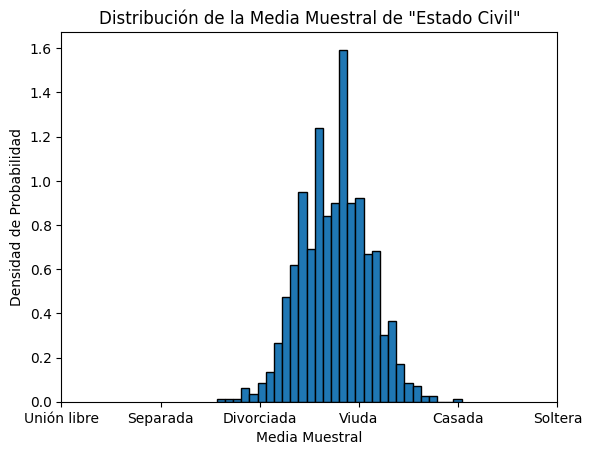

In [ ]:
estado_civil = Data['P3_1'].values
muestra_means = sampling_distribution(estado_civil, 30, 1000)
plt.hist(muestra_means, bins=30, edgecolor='black', density=True)
plt.xlabel('Media Muestral')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución de la Media Muestral de "Estado Civil"')
categoria_diccionario = {
    1: 'Unión libre',
    2: 'Separada',
    3: 'Divorciada',
    4: 'Viuda',
    5: 'Casada',
    6: 'Soltera',
}
plt.xticks(list(categoria_diccionario.keys()), [categoria_diccionario[i] for i in categoria_diccionario])
plt.show()

## Su pareja le ha dejado de hablar

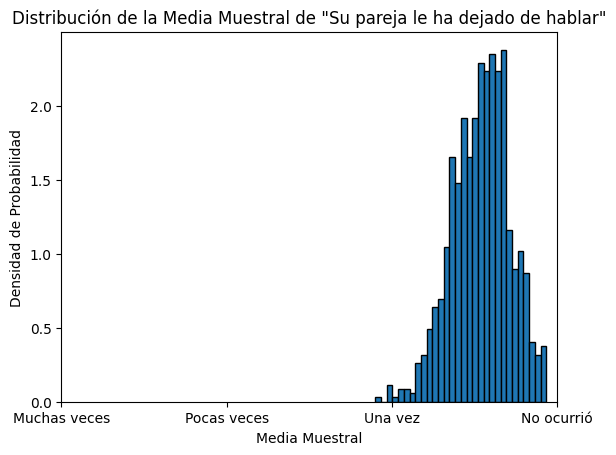

In [ ]:
dejado_de_hablar = Data['P14_1_21'].values
muestra_means = sampling_distribution(dejado_de_hablar, 30, 1000)
plt.hist(muestra_means, bins=30, edgecolor='black', density=True)
plt.xlabel('Media Muestral')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución de la Media Muestral de "Su pareja le ha dejado de hablar"')
categoria_diccionario = {
    1: 'Muchas veces',
    2: 'Pocas veces',
    3: 'Una vez',
    4: 'No ocurrió', #aqui se omitieron 'b': En blanco, y '9': No especificado
}
plt.xticks(list(categoria_diccionario.keys()), [categoria_diccionario[i] for i in categoria_diccionario])
plt.show()

## Su primera relacion sexual fue con su consentimiento

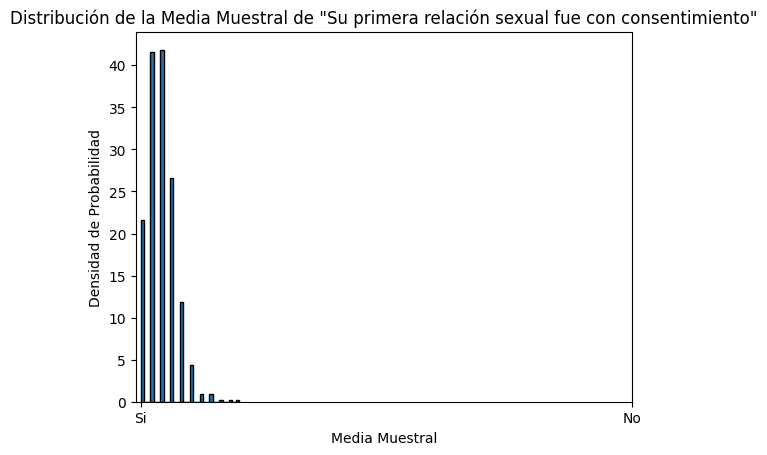

In [ ]:
consentimiento = Data['P13_7'].values
muestra_means = sampling_distribution(consentimiento, 50, 1000)
plt.hist(muestra_means, bins=30, edgecolor='black', density=True)
plt.xlabel('Media Muestral')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución de la Media Muestral de "Su primera relación sexual fue con consentimiento"')
categoria_diccionario = {
    1: 'Si',
    2: 'No',
}
plt.xticks(list(categoria_diccionario.keys()), [categoria_diccionario[i] for i in categoria_diccionario])
plt.show()

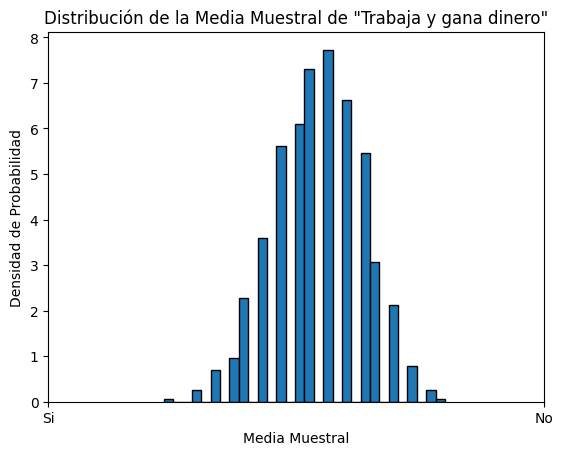

In [ ]:
trabaja_gana_dinero = Data['P4_1'].values
muestra_means = sampling_distribution(trabaja_gana_dinero, 30, 1000)
plt.hist(muestra_means, bins=30, edgecolor='black', density=True)
plt.xlabel('Media Muestral')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución de la Media Muestral de "Trabaja y gana dinero"')
categoria_diccionario = {
    1: 'Si',
    2: 'No',
}
plt.xticks(list(categoria_diccionario.keys()), [categoria_diccionario[i] for i in categoria_diccionario])
plt.show()

## Su pareja le ha hecho sentir miedo

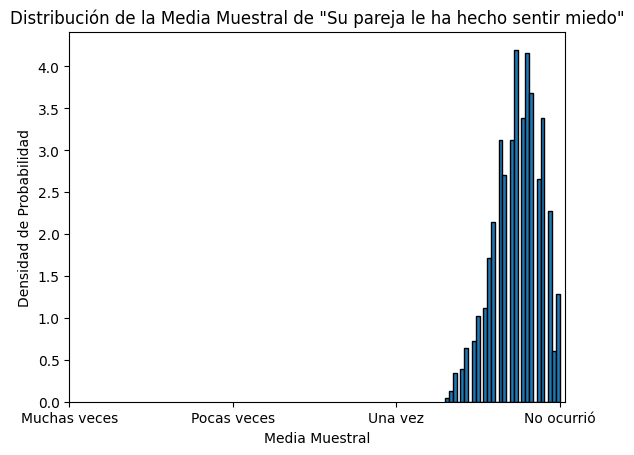

In [ ]:
sentir_miedo = Data['P14_1_13'].values
muestra_means = sampling_distribution(sentir_miedo, 30, 1000)
plt.hist(muestra_means, bins=30, edgecolor='black', density=True)
plt.xlabel('Media Muestral')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución de la Media Muestral de "Su pareja le ha hecho sentir miedo"')
categoria_diccionario = {
    1: 'Muchas veces',
    2: 'Pocas veces',
    3: 'Una vez',
    4: 'No ocurrió', #aqui se omitieron 'b': En blanco, y '9': No especificado
}
plt.xticks(list(categoria_diccionario.keys()), [categoria_diccionario[i] for i in categoria_diccionario])
plt.show()

# **Comparación**

Como se puede observar en las gráficas de distribución, la mayoría de las variables seleccionadas para este apartado tienden a comportarse de manera normal cuando la muestra es muy grande. Esto se debe al teorema del límite central. Sin embargo, hay algunas distribuciones que parecen no ser normales porque la densidad está concentrada en algún extremo de la gráfica.

# **Histogramas**

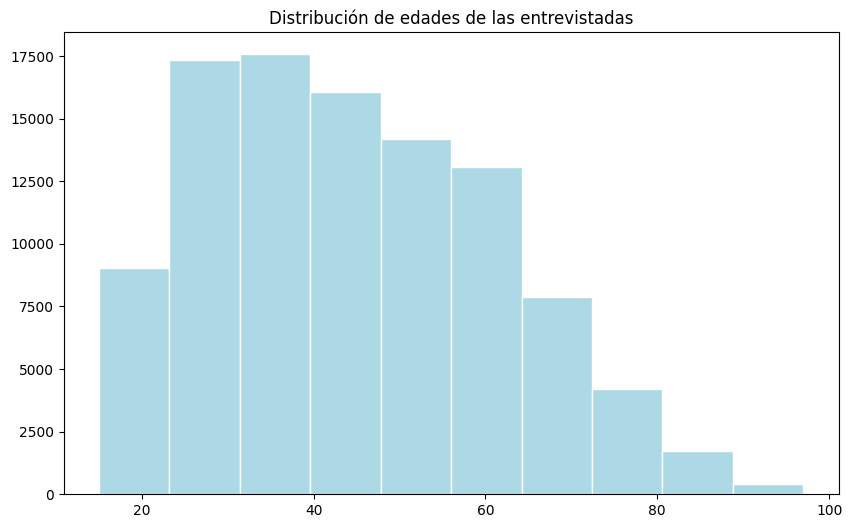

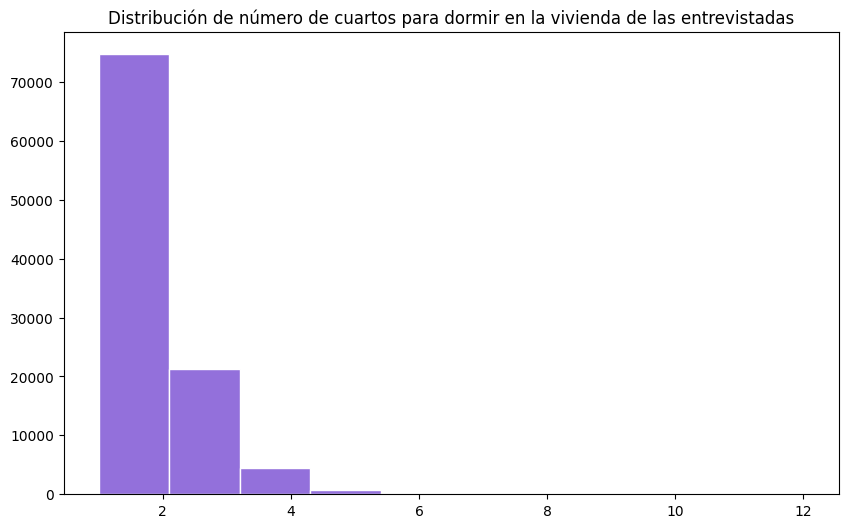

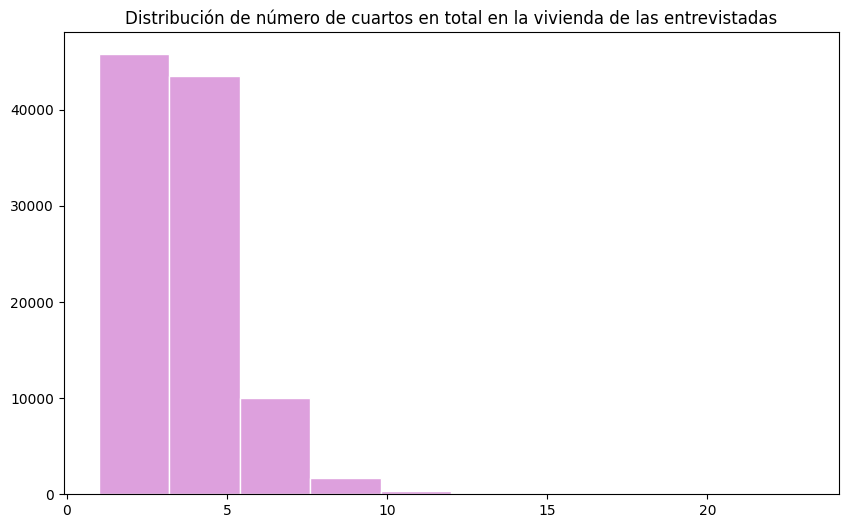

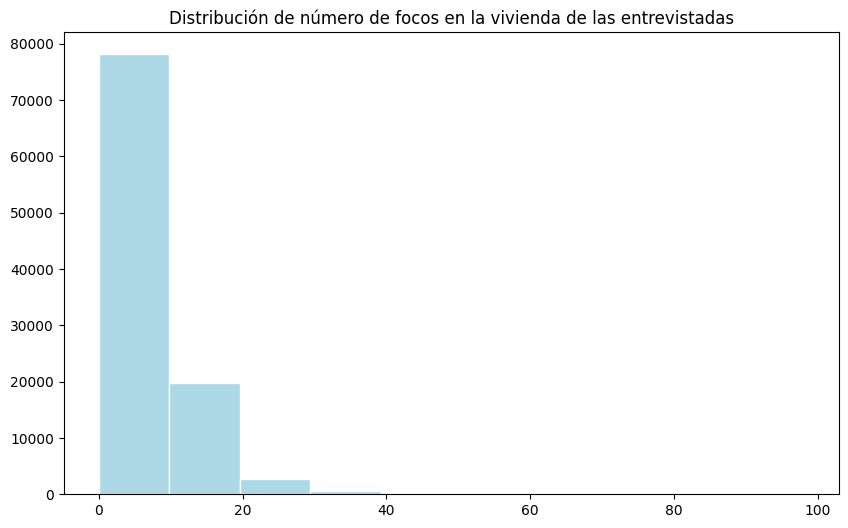

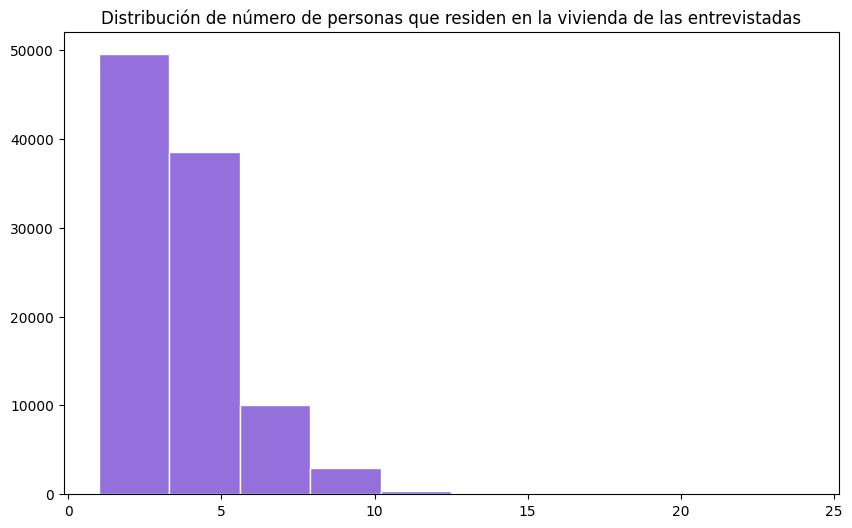

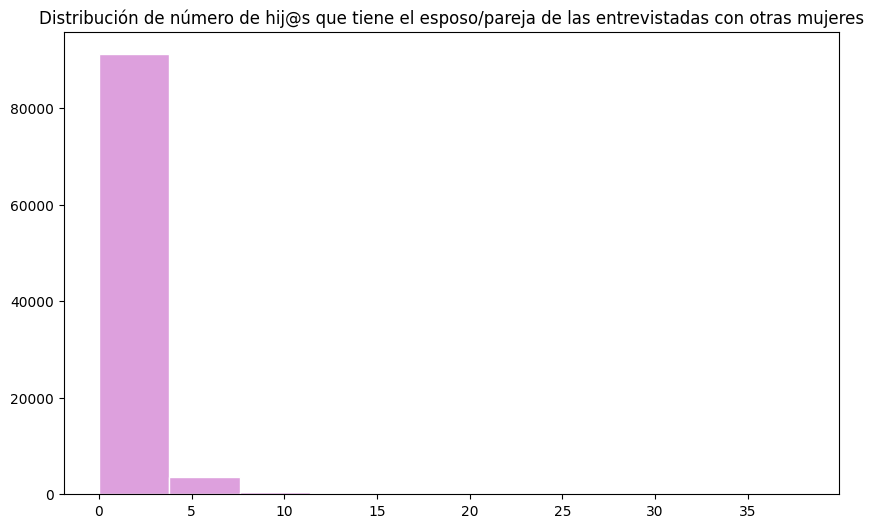

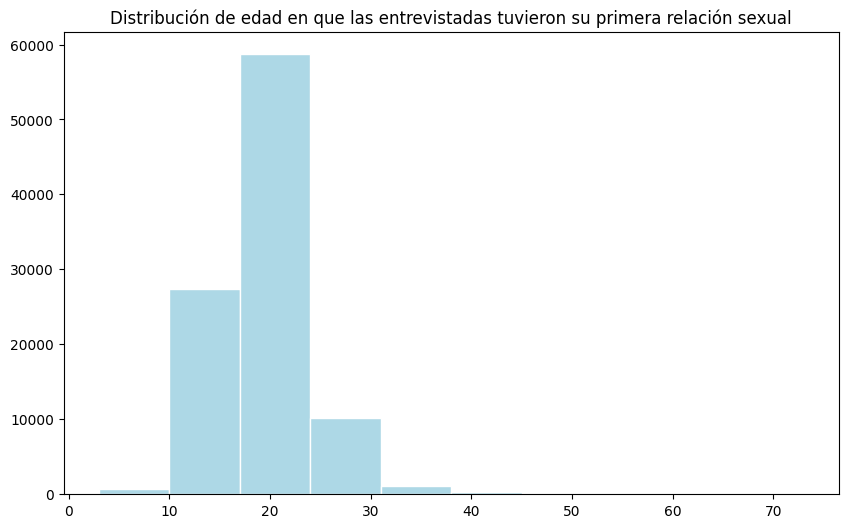

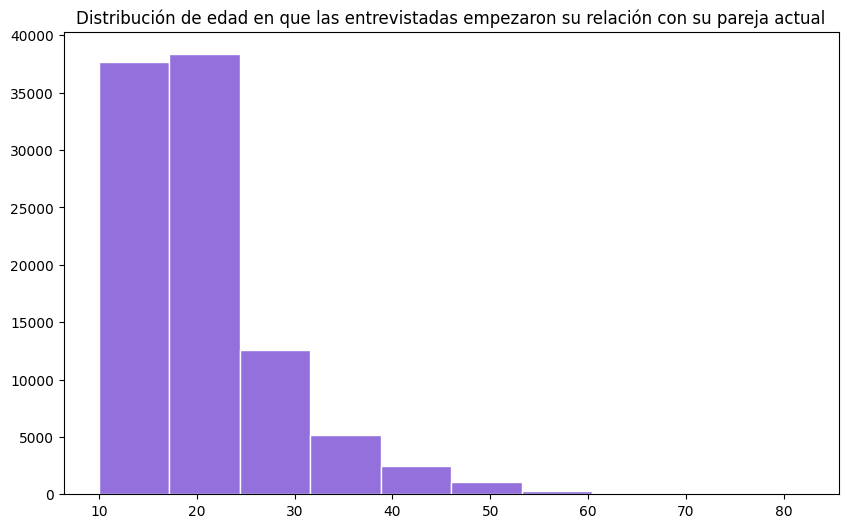

In [ ]:
#con pd.to_numeric, se convirtieron todas las variables que aparecían en el código como categoricas
#como numericas

Data["EDAD"] = pd.to_numeric(Data["EDAD"])
Data["EDAD"] = Data["EDAD"].replace(98, float("nan"))
Data["EDAD"] = Data["EDAD"].replace(99, float("nan"))
Data.hist(column="EDAD",bins=10,grid=False, edgecolor='white',figsize=(10,6),color="lightblue")
plt.title("Distribución de edades de las entrevistadas")
#Se eliminan los valores de 98 (Edad no especificada en personas de 15 años o más)
#y 99 (Edad no especificada)

Data["P1_2"] = pd.to_numeric(Data["P1_2"])
Data.hist(column="P1_2",bins=10, grid=False, edgecolor='white', figsize=(10,6), color="mediumpurple")
plt.title("Distribución de número de cuartos para dormir en la vivienda de las entrevistadas")


Data["P1_2_A"] = pd.to_numeric(Data["P1_2_A"])
Data.hist(column="P1_2_A",bins=10,grid=False, edgecolor='white', figsize=(10,6),color="plum")
plt.title("Distribución de número de cuartos en total en la vivienda de las entrevistadas")

Data["P1_3"] = pd.to_numeric(Data["P1_3"])
Data.hist(column="P1_3",bins=10,grid=False, edgecolor='white',figsize=(10,6),color="lightblue")
plt.title("Distribución de número de focos en la vivienda de las entrevistadas")

Data["P1_7"] = pd.to_numeric(Data["P1_7"])
Data.hist(column="P1_7",bins=10,grid=False, edgecolor='white',figsize=(10,6), color="mediumpurple")
plt.title("Distribución de número de personas que residen en la vivienda de las entrevistadas")

Data["P13_4"] = pd.to_numeric(Data["P13_4"])
Data["P13_4"] = Data["P13_4"].replace(98, float("nan"))
Data["P13_4"] = Data["P13_4"].replace(99, float("nan"))
Data.hist(column="P13_4",bins=10,grid=False,edgecolor='white', figsize=(10,6),color="plum")
plt.title("Distribución de número de hij@s que tiene el esposo/pareja de las entrevistadas con otras mujeres")
#Se eliminan los valores de 98 (No sabe)
#y 99 (No especificado)

Data["P13_6"] = pd.to_numeric(Data["P13_6"])
Data["P13_6"] = Data["P13_6"].replace(0, float("nan"))
Data["P13_6"] = Data["P13_6"].replace(98, float("nan"))
Data["P13_6"] = Data["P13_6"].replace(99, float("nan"))
Data["P13_6"] = Data["P13_6"].replace(999, float("nan"))
Data.hist(column="P13_6",bins=10,grid=False, edgecolor='white',figsize=(10,6), color="lightblue")
plt.title("Distribución de edad en que las entrevistadas tuvieron su primera relación sexual")
#Se eliminan los valores de 0 (No ha tenido relaciones sexuales)
#98 (No recuerda)
#99 (No quiso responder)
#y 999 (No especificado)

Data["P13_8"] = pd.to_numeric(Data["P13_8"])
Data["P13_8"] = Data["P13_8"].replace(0, float("nan"))
Data["P13_8"] = Data["P13_8"].replace(98, float("nan"))
Data["P13_8"] = Data["P13_8"].replace(99, float("nan"))
Data.hist(column="P13_8",bins=10,grid=False, edgecolor='white',figsize=(10,6),color="mediumpurple")
plt.title("Distribución de edad en que las entrevistadas empezaron su relación con su pareja actual")
#Se eliminan los valores de 0 (No ha tenido novio)
#98 (No recuerda)
#99 (No especificado)

plt.show();

# **Pie Charts**

<ipython-input-55-f89c0751d2fb>:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


[Text(0.5, 1.0, 'Alguien del hogar es dueño de otra casa.o departamento')]

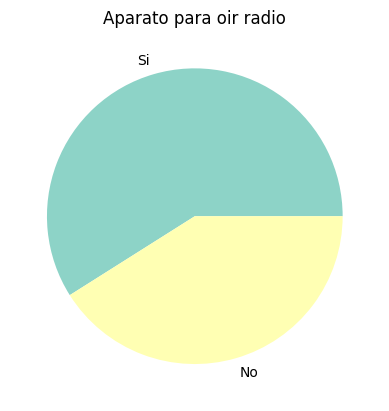

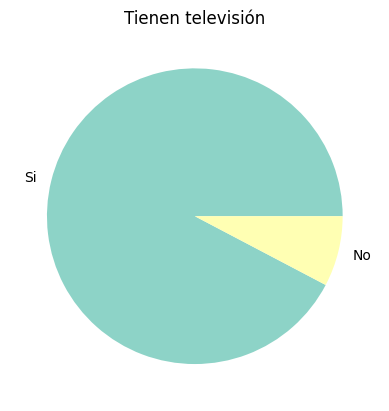

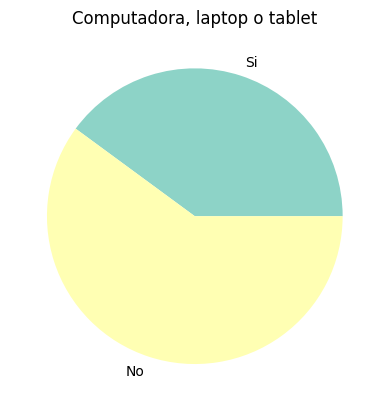

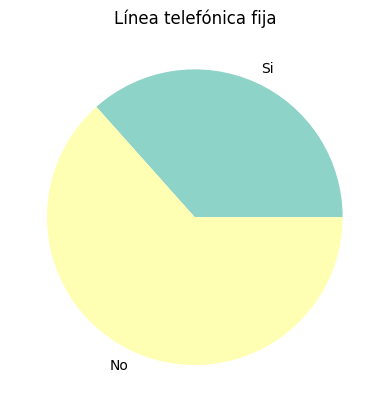

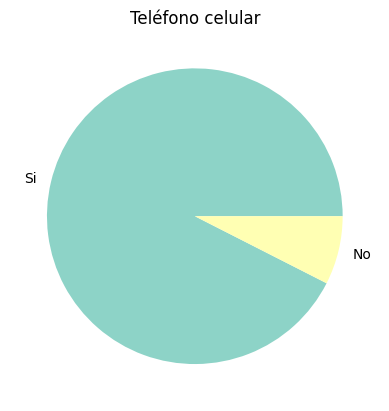

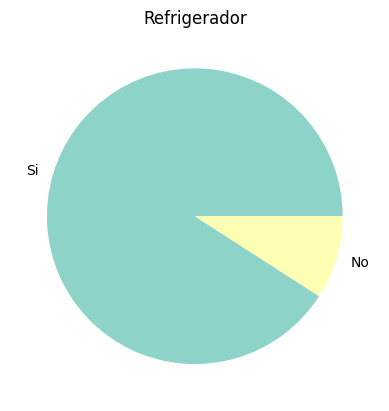

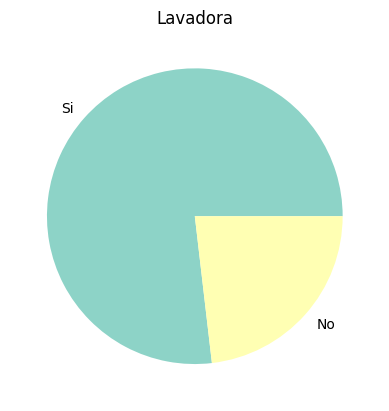

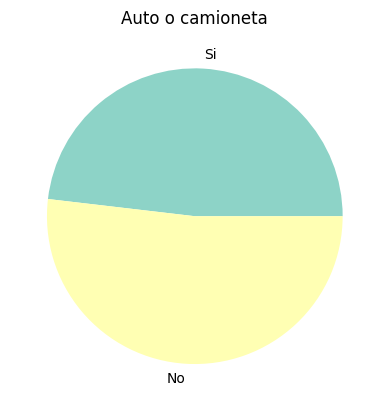

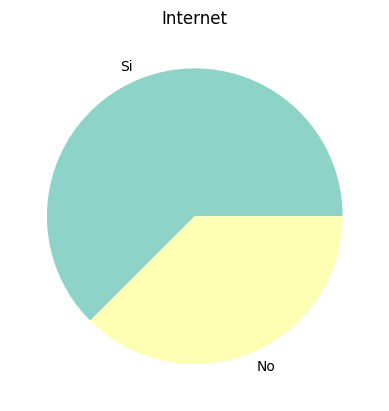

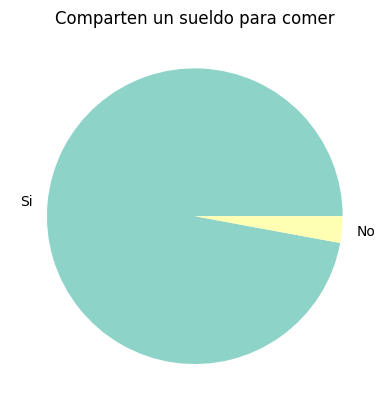

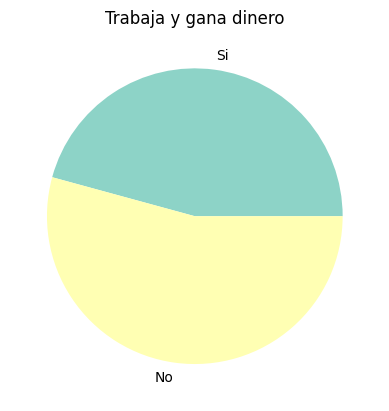

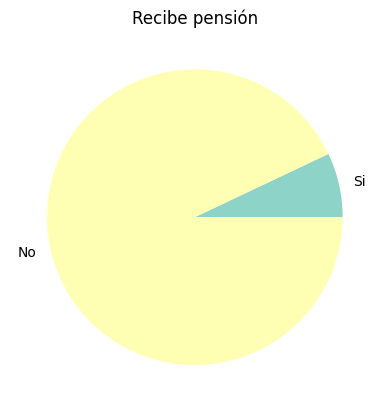

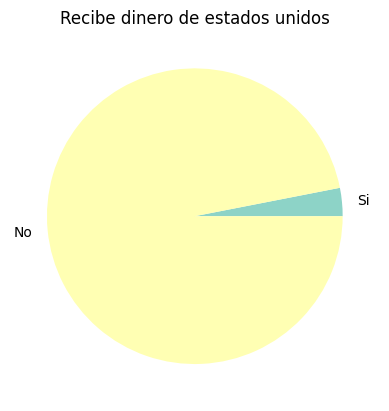

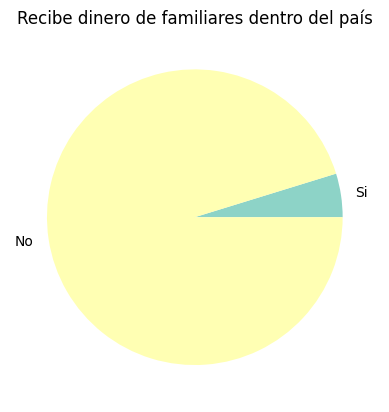

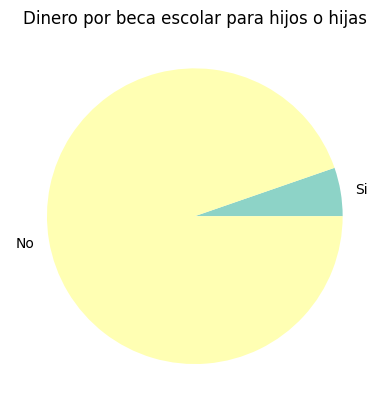

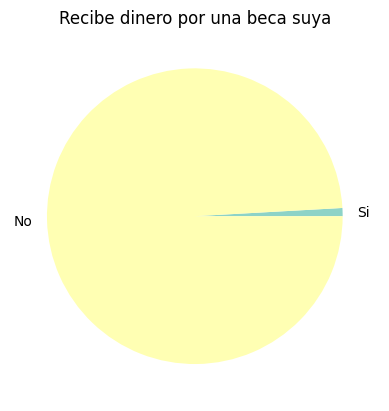

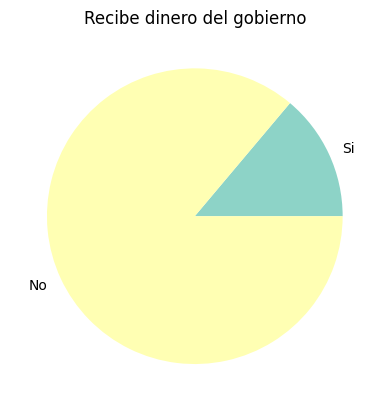

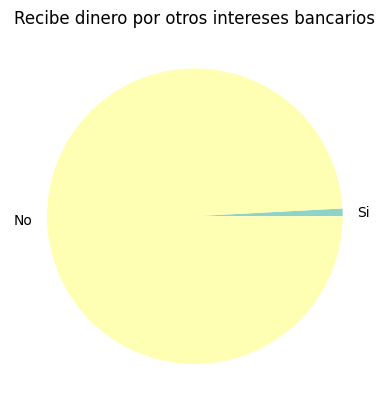

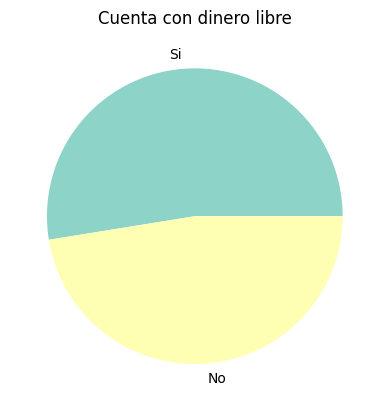

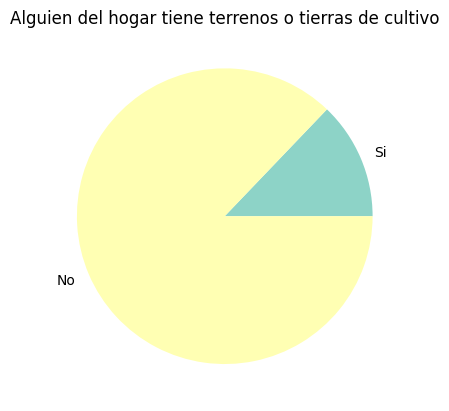

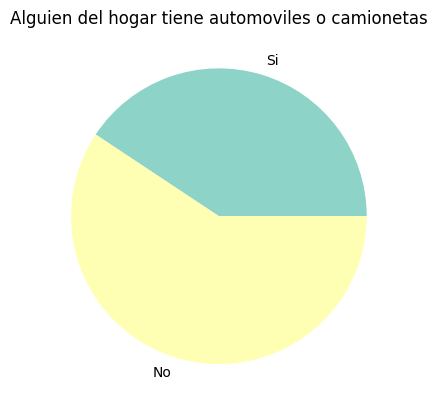

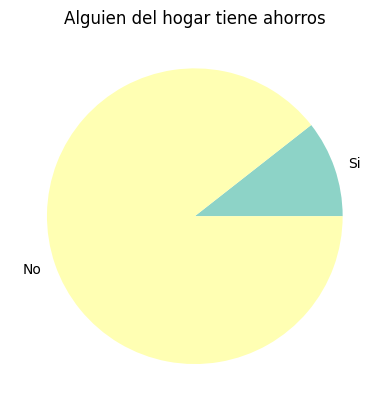

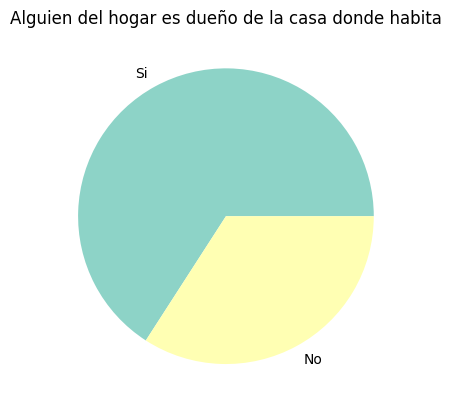

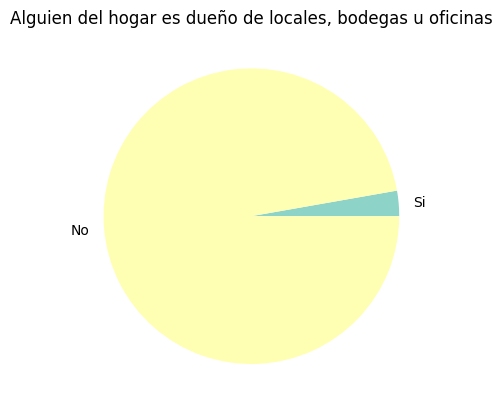

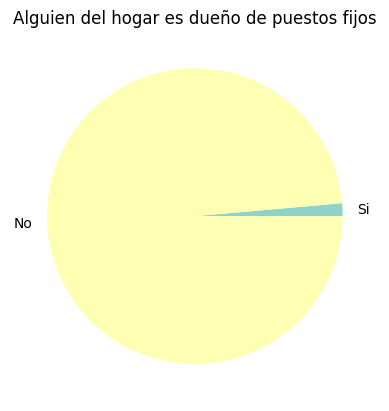

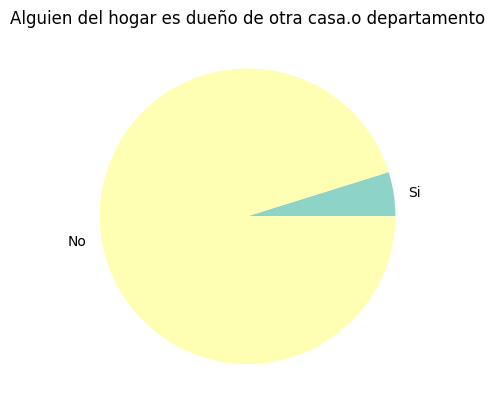

In [ ]:

grupos = ["Si", "No"]
valor = [Data["P1_4_1"].value_counts()[1], Data["P1_4_1"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Aparato para oir radio")

grupos = ["Si", "No"]
valor = [Data["P1_4_2"].value_counts()[1], Data["P1_4_2"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Tienen televisión")

grupos = ["Si", "No"]
valor = [Data["P1_4_3"].value_counts()[1], Data["P1_4_3"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Computadora, laptop o tablet")


grupos = ["Si", "No"]
valor = [Data["P1_4_4"].value_counts()[1], Data["P1_4_4"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Línea telefónica fija")

grupos = ["Si", "No"]
valor = [Data["P1_4_5"].value_counts()[1], Data["P1_4_5"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Teléfono celular")

grupos = ["Si", "No"]
valor = [Data["P1_4_6"].value_counts()[1], Data["P1_4_6"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Refrigerador")

grupos = ["Si", "No"]
valor = [Data["P1_4_7"].value_counts()[1], Data["P1_4_7"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Lavadora")

grupos = ["Si", "No"]
valor = [Data["P1_4_8"].value_counts()[1], Data["P1_4_8"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Auto o camioneta")

grupos = ["Si", "No"]
valor = [Data["P1_4_9"].value_counts()[1], Data["P1_4_9"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Internet")

grupos = ["Si", "No"]
valor = [Data["P1_8"].value_counts()[1], Data["P1_8"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Comparten un sueldo para comer")

grupos = ["Si", "No"]
valor = [Data["P4_1"].value_counts()[1], Data["P4_1"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Trabaja y gana dinero")

grupos = ["Si", "No"]
valor = [Data["P4_8_1"].value_counts()[1], Data["P4_8_1"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Recibe pensión")

grupos = ["Si", "No"]
valor = [Data["P4_8_2"].value_counts()[1], Data["P4_8_2"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Recibe dinero de estados unidos")

grupos = ["Si", "No"]
valor = [Data["P4_8_3"].value_counts()[1], Data["P4_8_3"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Recibe dinero de familiares dentro del país")

grupos = ["Si", "No"]
valor = [Data["P4_8_4"].value_counts()[1], Data["P4_8_4"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Dinero por beca escolar para hijos o hijas")

grupos = ["Si", "No"]
valor = [Data["P4_8_5"].value_counts()[1], Data["P4_8_5"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Recibe dinero por una beca suya")

grupos = ["Si", "No"]
valor = [Data["P4_8_6"].value_counts()[1], Data["P4_8_6"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Recibe dinero del gobierno")

grupos = ["Si", "No"]
valor = [Data["P4_8_7"].value_counts()[1], Data["P4_8_7"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Recibe dinero por otros intereses bancarios")

grupos = ["Si", "No"]
valor = [Data["P4_11"].value_counts()[1], Data["P4_11"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Cuenta con dinero libre")

grupos = ["Si", "No"]
valor = [Data["P4_12_1"].value_counts()[1], Data["P4_12_1"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Alguien del hogar tiene terrenos o tierras de cultivo")

grupos = ["Si", "No"]
valor = [Data["P4_12_2"].value_counts()[1], Data["P4_12_2"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Alguien del hogar tiene automoviles o camionetas")

grupos = ["Si", "No"]
valor = [Data["P4_12_3"].value_counts()[1], Data["P4_12_3"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Alguien del hogar tiene ahorros")

grupos = ["Si", "No"]
valor = [Data["P4_12_4"].value_counts()[1], Data["P4_12_4"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Alguien del hogar es dueño de la casa donde habita")

grupos = ["Si", "No"]
valor = [Data["P4_12_5"].value_counts()[1], Data["P4_12_5"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Alguien del hogar es dueño de locales, bodegas u oficinas")

grupos = ["Si", "No"]
valor = [Data["P4_12_6"].value_counts()[1], Data["P4_12_6"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Alguien del hogar es dueño de puestos fijos")

grupos = ["Si", "No"]
valor = [Data["P4_12_7"].value_counts()[1], Data["P4_12_7"].value_counts()[2]]
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors=sns.color_palette('Set3'))
ax.set(title="Alguien del hogar es dueño de otra casa.o departamento")


# **Bar charts**

<ipython-input-56-be9c3a621888>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="P1_1", data=Data, palette="pastel")
<ipython-input-56-be9c3a621888>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="P1_5", data=Data, palette="pastel")
<ipython-input-56-be9c3a621888>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="P1_6", data=Data, palette="pastel")
<ipython-input-56-be9c3a621888>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

<Axes: xlabel='P13_7', ylabel='count'>

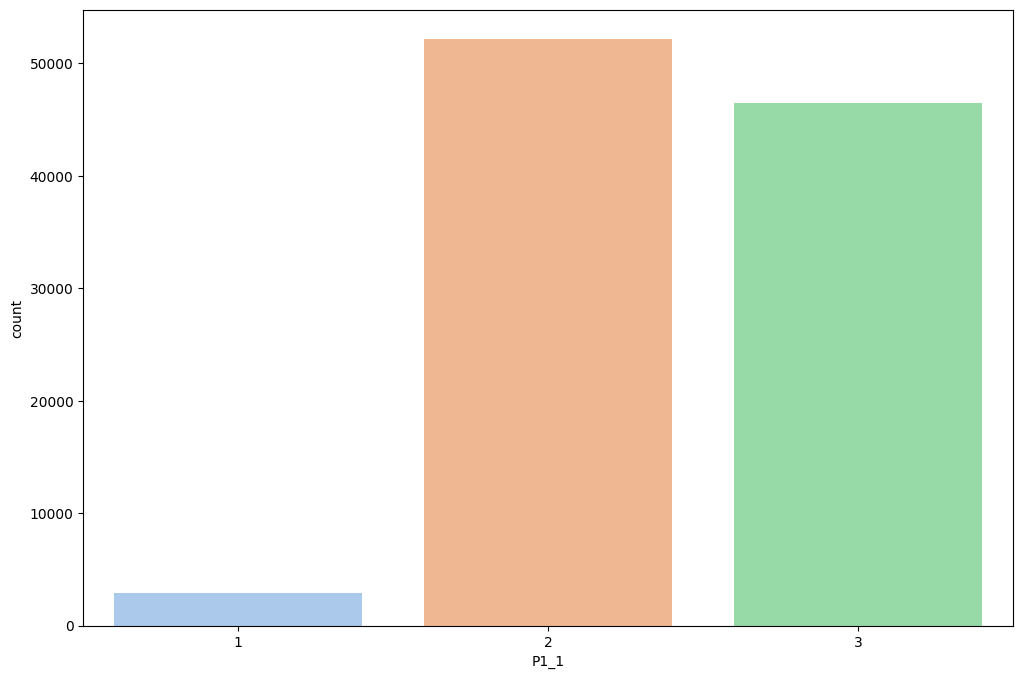

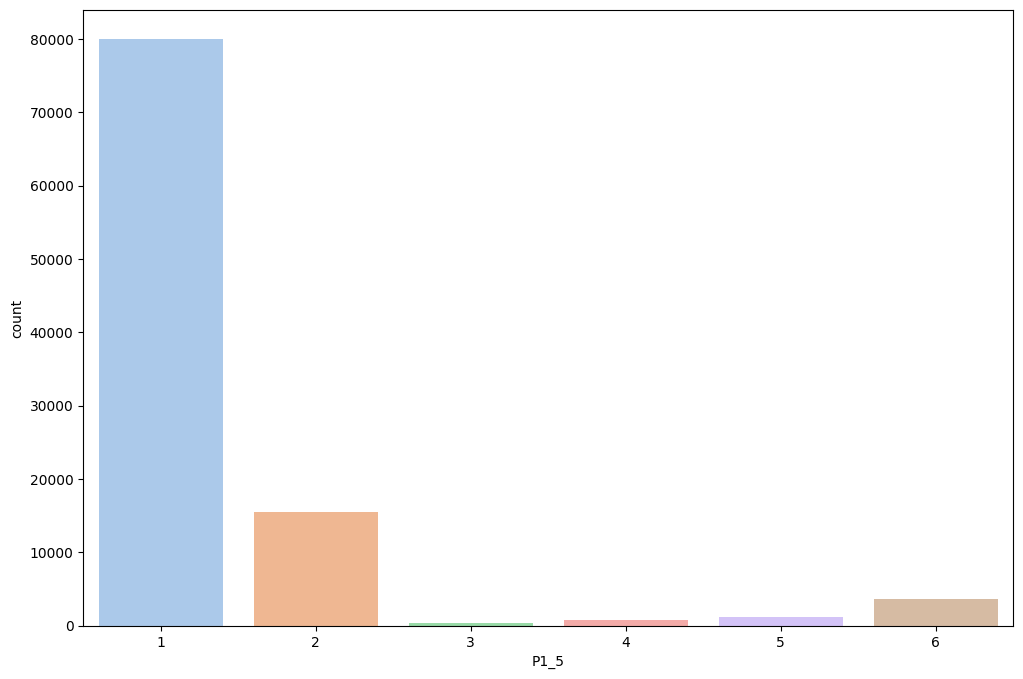

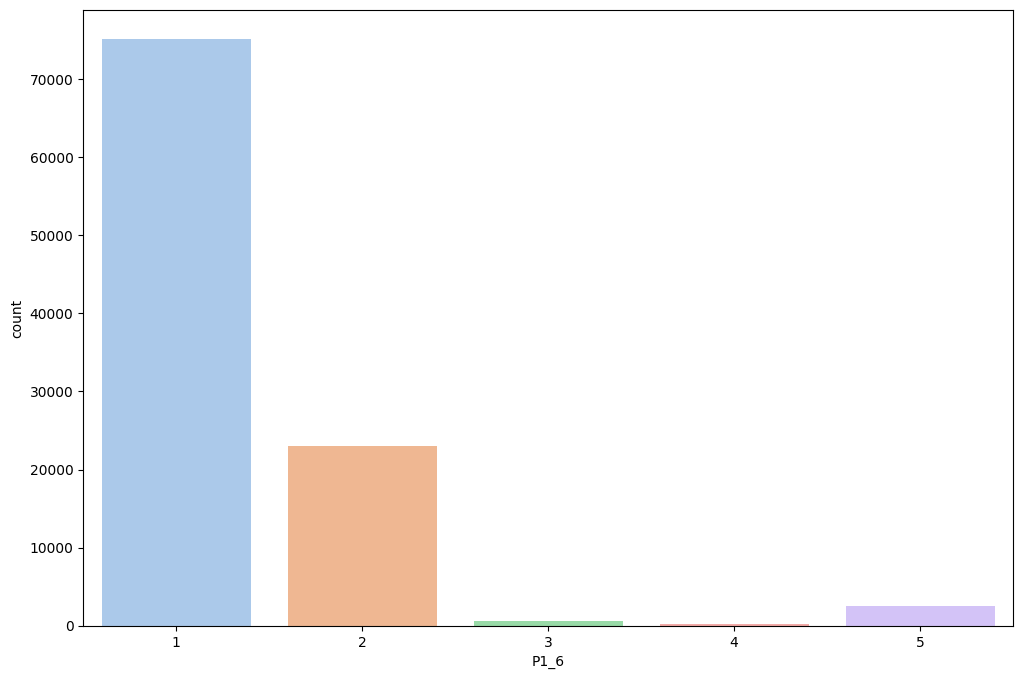

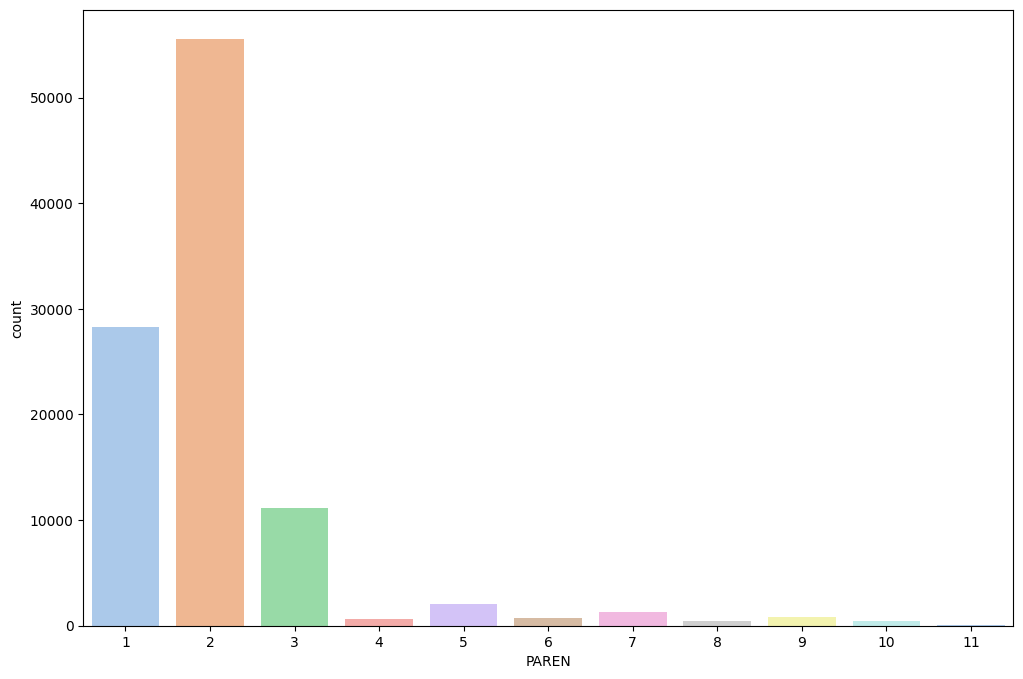

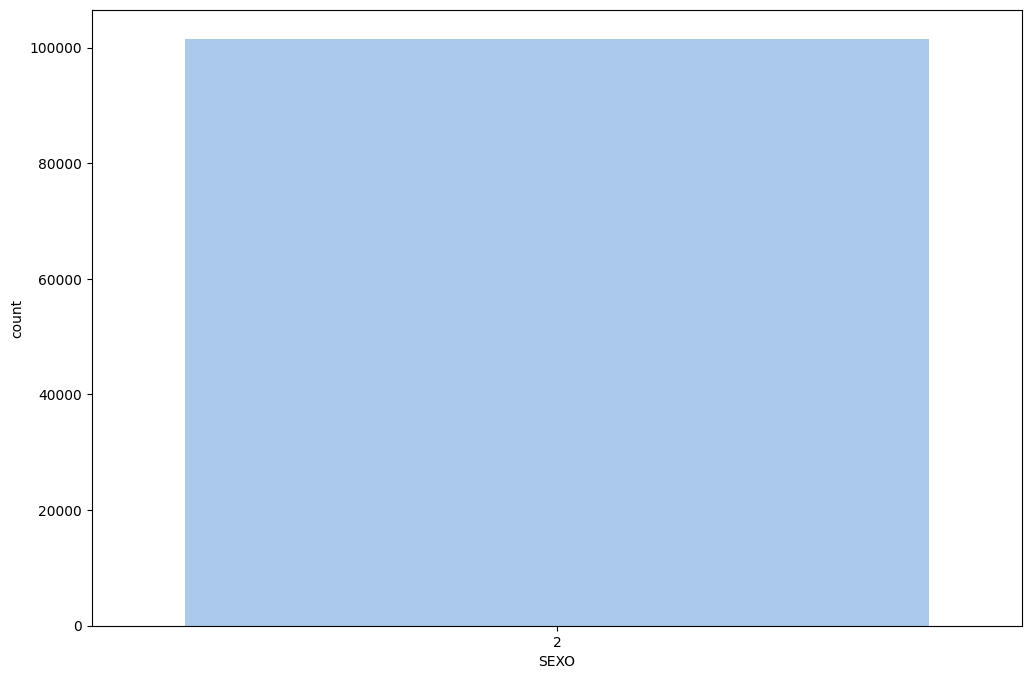

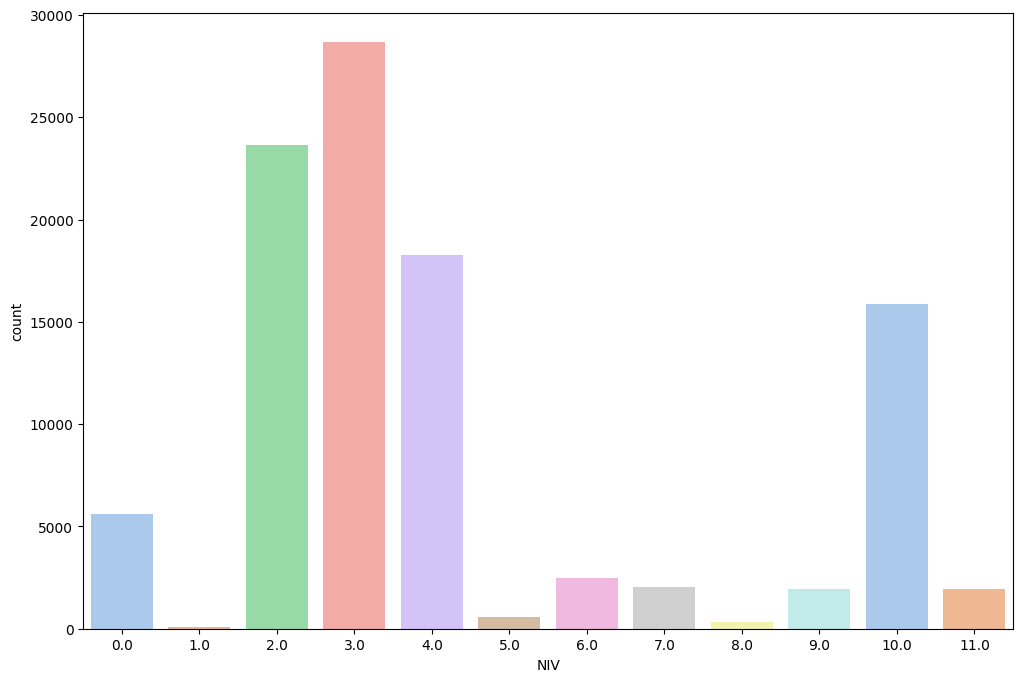

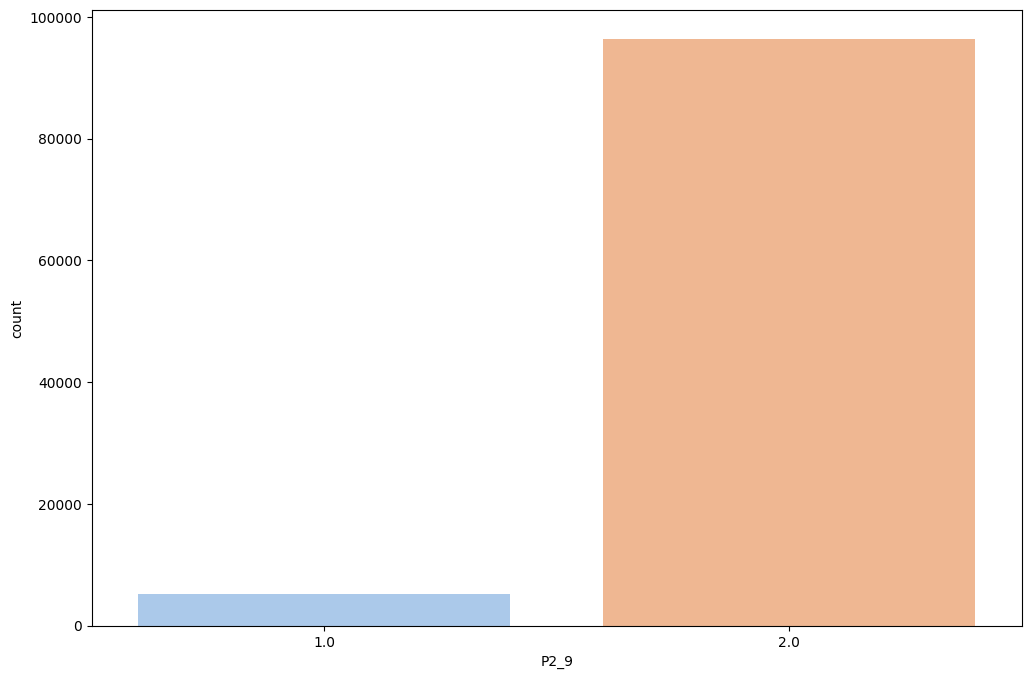

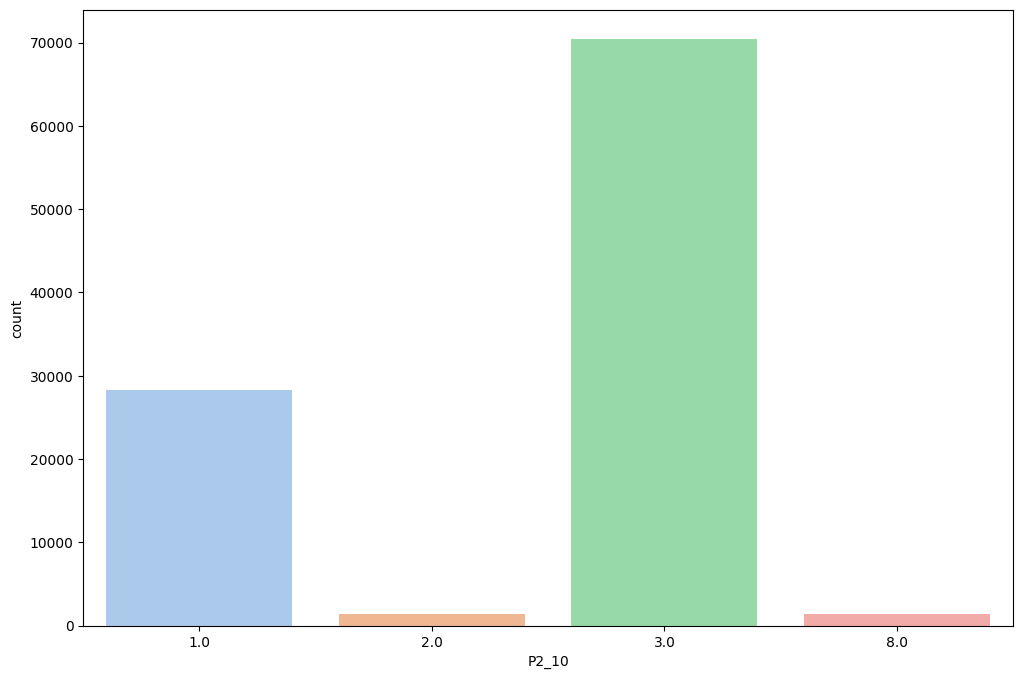

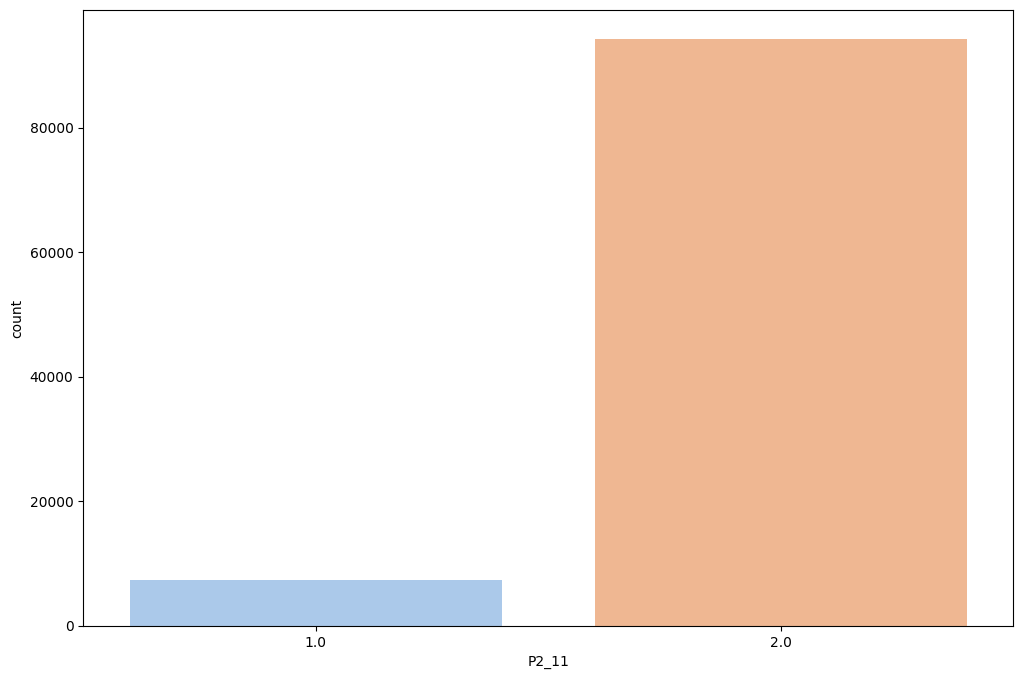

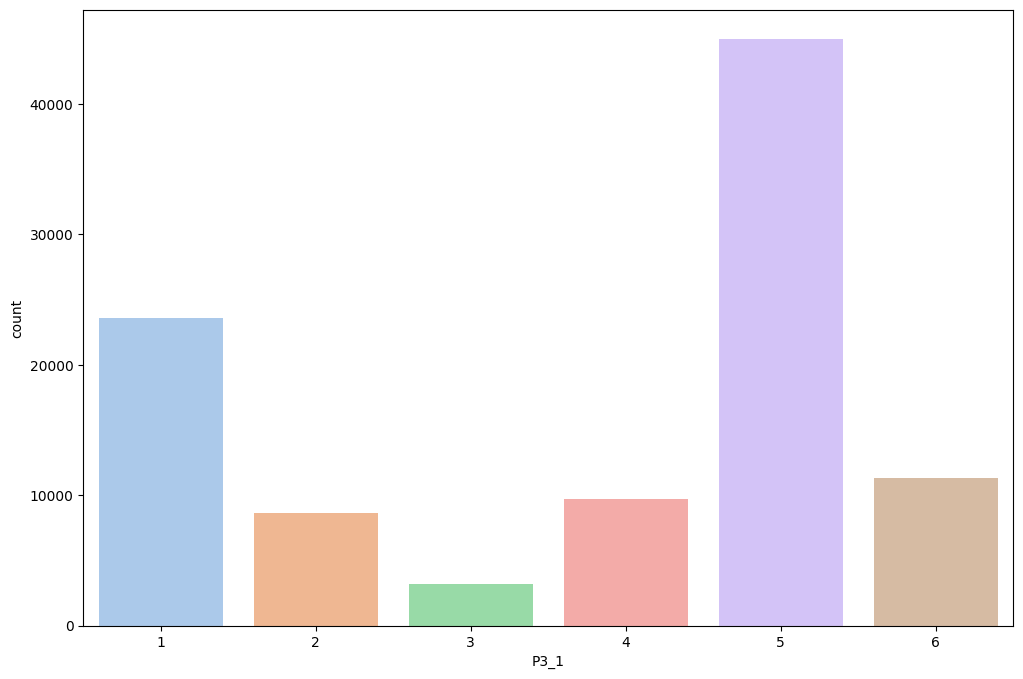

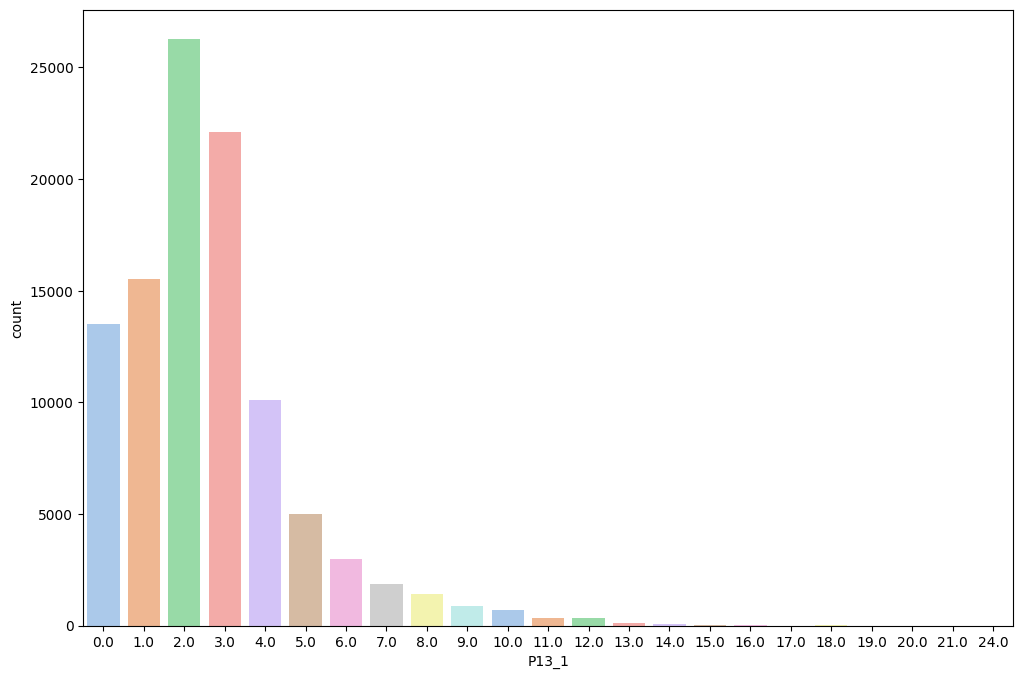

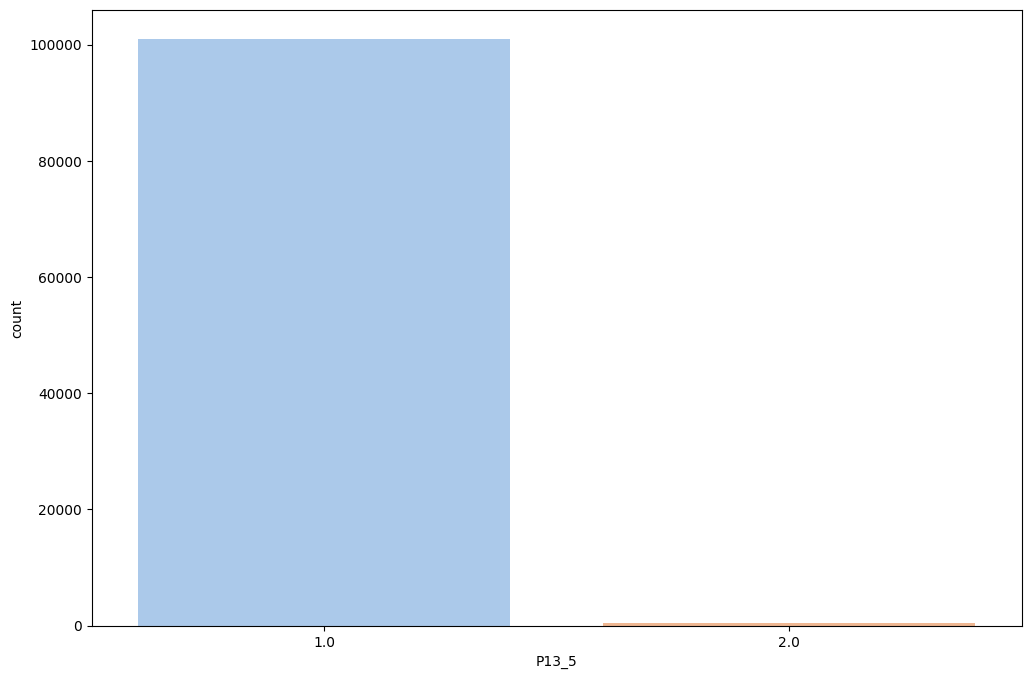

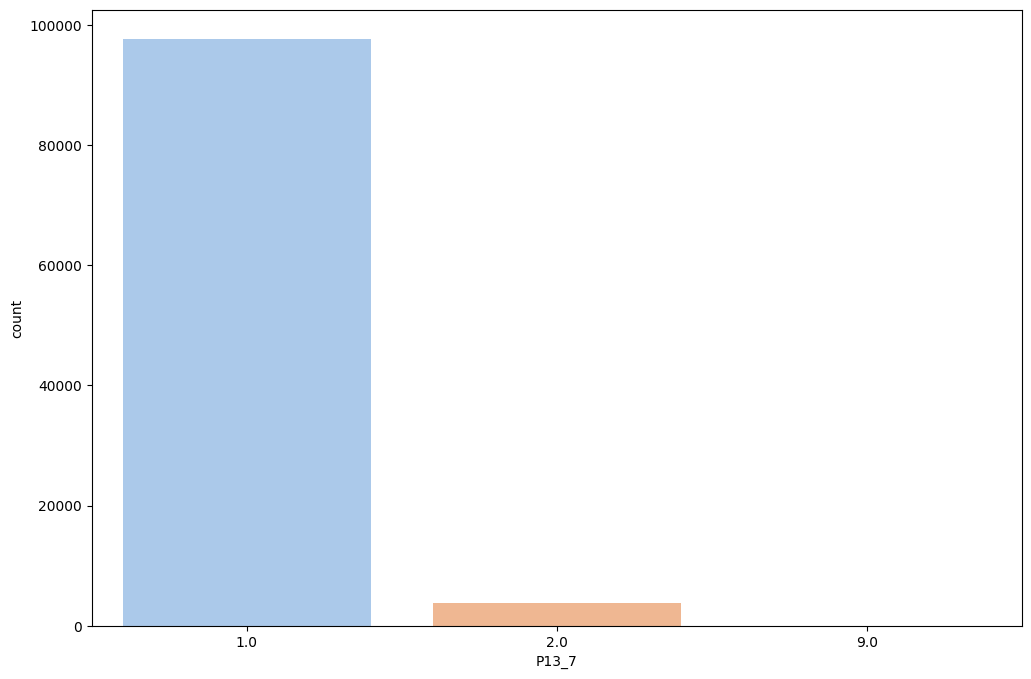

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="P1_1", data=Data, palette="pastel")

plt.figure(figsize=(12,8))
sns.countplot(x="P1_5", data=Data, palette="pastel")

plt.figure(figsize=(12,8))
sns.countplot(x="P1_6", data=Data, palette="pastel")

plt.figure(figsize=(12,8))
sns.countplot(x="PAREN", data=Data, palette="pastel")

plt.figure(figsize=(12,8))
sns.countplot(x="SEXO", data=Data, palette="pastel")

plt.figure(figsize=(12,8))
sns.countplot(x="NIV", data=Data, palette="pastel")

plt.figure(figsize=(12,8))
sns.countplot(x="P2_9", data=Data, palette="pastel")

plt.figure(figsize=(12,8))
sns.countplot(x="P2_10", data=Data, palette="pastel")

plt.figure(figsize=(12,8))
sns.countplot(x="P2_11", data=Data, palette="pastel")

plt.figure(figsize=(12,8))
sns.countplot(x="P3_1", data=Data, palette="pastel")

plt.figure(figsize=(12,8))
sns.countplot(x="P13_1", data=Data, palette="pastel")

plt.figure(figsize=(12,8))
sns.countplot(x="P13_5", data=Data, palette="pastel")

plt.figure(figsize=(12,8))
sns.countplot(x="P13_7", data=Data, palette="pastel")

## Sexo de su pareja

#**Histogramas (¿Hay sesgo en los datos?)**

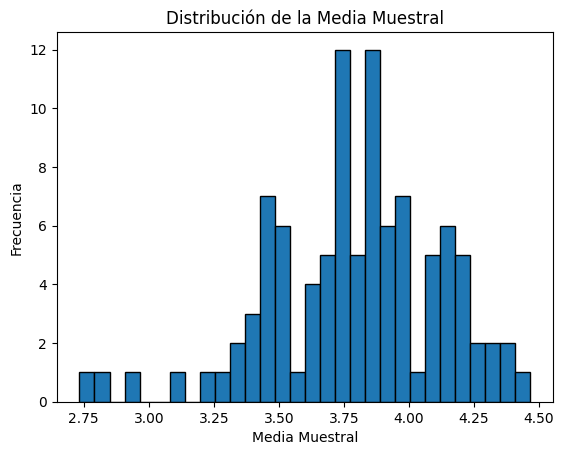

In [ ]:
muestra_means = sampling_distribution(Data['P3_1'].values, 30, 100)

plt.hist(muestra_means, bins=30, edgecolor='black')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Media Muestral')
plt.show()

In [ ]:
#Data.to_csv('DataFrame_menos_vars.csv')

#**Preguntas**



1. ¿Cuáles son las dimensiones del dataset?

110,126  x  172

2. ¿Cuántas variables categóricas existen?

26 variables categóricas

3. ¿Cuántas variables numéricas hay?

146 variables numéricas

4. ¿Cuántas posibles variables objeto hay?

Antes de realizar las modificaciones adecuadas había 26 variables de tipo objeto.

5. ¿Cuánto ruido existe en el dataset?

Muchos, ya que el dataset tienen demasiados valores atípicos. Tanto así que algunos histogramas son afectados por ello

6. ¿Cuántos valores nulos existen en la base de datos?

Hay 8,645 de un total de 110127 valores

7. ¿Qué porcentajes por cada variable?

Estas varían dependiendo de la variable, teniendo variables para la mayoría de datos que llegan a  más de 97 mientras otras de entrada no tenían ningún valor nulo. Al final nuestra variable quedó sin datos nulos

8. ¿A partir de que valor de "n" la distribución tiende a verse "normal"?

En la distribución de nuestras variables, primeo aparecen datos aleatorios, para después empezar una distribución normal a partir del dato de valor 3
Depende de la variable de nuestras distrivuciones.

9. ¿Nuestros datos están sesgados?

Como se puede ver en la mayoría de los histogramas anteriores, ocurre un claro sesgo positivo o hacia la derecha en las gráficas. Muchos factores contribuyen a este sesgo, como la distribución de la población mexicana que hace que los valores se inclinen más a los jóvenes, la aplicación de la encuesta en mayormente ciudades dejando a un lado una muy grande parte de la población rural, así como los datos extremos que afectan severamente la distribución de los histogramos. En general, nuestros datos tienen un sesgo postivo por las características generales de la mujer mexicana, así como el tipo de persona que tendría la disponibilidad para poder participar en la encuesta



## **Conclusión**

Para este trabajo, buscamos medir y predecir la violencia de género ocurrida en el ámbito de la pareja, tomando en cuenta también su nivel socioeconómico, sobre todo la parte de su vivienda. Por lo mismo, se eligieron seis bases de datos que nos pudieran brindar información específica de lo anteriormente descrito.

Al crear una sola base de datos, nos dimos cuenta que había un exceso de variables (habiendo más de 250 columnas), ya que más de la mitad de ellas poseía un porcentaje mayor al 80% de datos faltantes, por lo que se decidió, en primera instancia, borrar aquellas columnas que poseían un porcentaje mayor al 10% de datos en blanco, de esta manera, se priorizó la conservación de los registros y una vez creada de nuevo la nueva base de datos, solo se quitaron los pocos registros vacíos que quedaban, de tal manera que después de todos los ajustes (incluyendo la eliminación de datos duplicados), terminamos con "Data Frame" con 81 variables.

Gracias a esta limpieza, fue más sencillo identificar aquellas variables que nos pudieran servir para hacer los suficientes histogramas que nos pudieran indicar si los datos están sesgados o no, posteriormente se realizaron los samples y así contestar aquellas preguntas estadísticas del documento.

Se creó una variable *booleana* para determinar si una persona sufre violencia a partir de las existentes para agregar valor al clasificador. Esta variable es el resultado de un operador lógico de unión, donde se contemplan las variables de la base de datos 14, en el que se responden preguntas explícitas sobre sucesos violentos.

Finalmente, determinamos que las 5 variable más significativas encontradas son: *"P2_9"* (nivel de estudios de la persona entrevistada), *"P1_3"* (número de focos en la vivienda), *"P1_4_5"* (si la persona cuenta con teléfono celular),  *"P3_1"* (estado civil de la persona) y *"P4_11"* (si la persona cuenta con dinero libre). Aunque, consideramos que la variable *"P13_6"* (cuántos años tenía cuando tuvo su primera relación sexual), sería un buen agregado a estas últimas.

In [ ]:
!jupyter nbconvert --execute --to html "/content/Actividad_Data_Engineering_(RA).ipynb"

[NbConvertApp] WARNING | pattern '/content/Actividad_Data_Engineering_(RA).ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.a